# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('csv/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.set_index('PassengerId',inplace=True)

In [7]:
df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


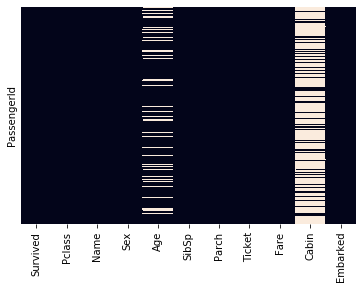

In [8]:
# plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

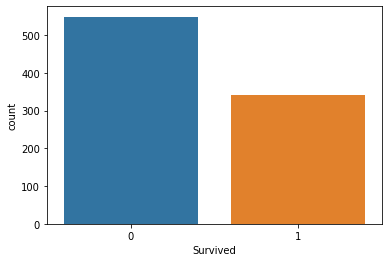

In [9]:
sns.countplot(x='Survived',data=df)

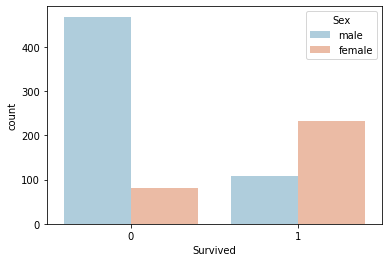

In [10]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

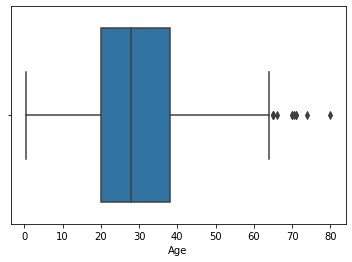

In [11]:
sns.boxplot(x='Age',data=df)

/home/siavash/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/siavash/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([24., 16.,  7.,  7., 10.,  5.,  8., 23., 39., 40., 52., 46., 42.,
        43., 47., 37., 32., 41., 18., 27., 21., 14., 17., 18., 16., 13.,
         9.,  7.,  7.,  6.,  7.,  4.,  4.,  0.,  2.,  3.,  1.,  0.,  0.,
         1.]),
 array([ 0.42  ,  2.4095,  4.399 ,  6.3885,  8.378 , 10.3675, 12.357 ,
        14.3465, 16.336 , 18.3255, 20.315 , 22.3045, 24.294 , 26.2835,
        28.273 , 30.2625, 32.252 , 34.2415, 36.231 , 38.2205, 40.21  ,
        42.1995, 44.189 , 46.1785, 48.168 , 50.1575, 52.147 , 54.1365,
        56.126 , 58.1155, 60.105 , 62.0945, 64.084 , 66.0735, 68.063 ,
        70.0525, 72.042 , 74.0315, 76.021 , 78.0105, 80.    ]),
 <a list of 40 Patch objects>)

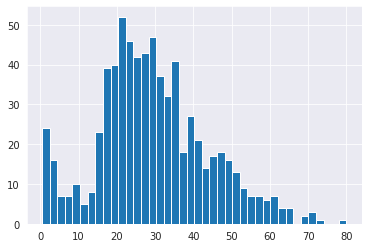

In [12]:
sns.set_style('darkgrid')
plt.hist(df['Age'],bins=40)

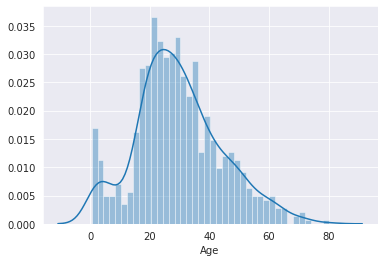

In [13]:
sns.distplot(a=df[df['Age'].notnull()]['Age'],bins=40)

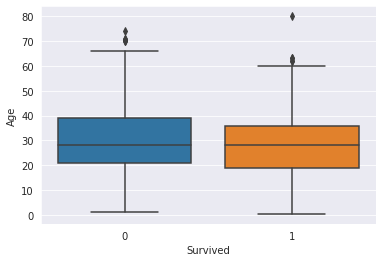

In [14]:
sns.boxplot(x='Survived',y='Age',data=df)

[]

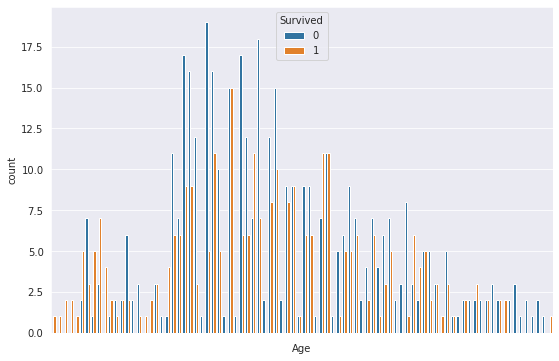

In [15]:
plt.figure(figsize=(9,6))
g=sns.countplot(x='Age',hue='Survived',data=df)
g.set_xticklabels(labels=[])

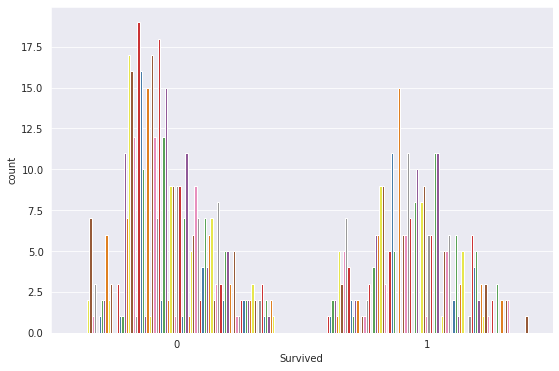

In [16]:
plt.figure(figsize=(9,6))
g=sns.countplot(x='Survived',hue='Age',data=df,palette='Set1')
g.legend_.remove()

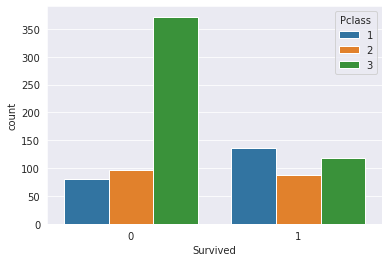

In [17]:
sns.countplot(x='Survived',hue='Pclass',data=df)

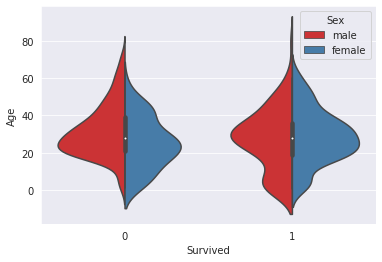

In [18]:
sns.violinplot(x='Survived',y='Age',data=df,
               hue='Sex', split=True, palette='Set1')

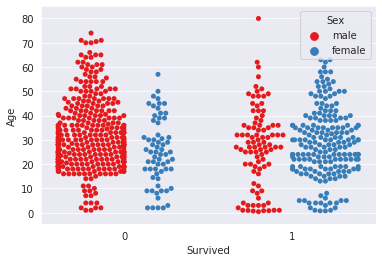

In [19]:
sns.swarmplot(x='Survived',y='Age',hue='Sex', data=df, palette="Set1", dodge=True)

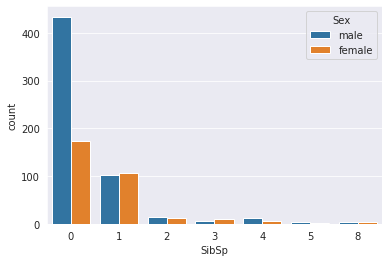

In [20]:
sns.countplot(x='SibSp',hue='Sex',data=df)

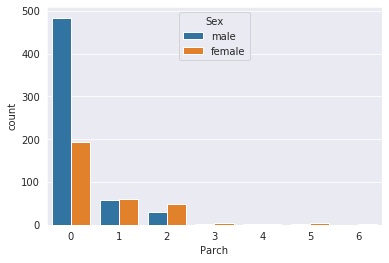

In [21]:
sns.countplot(x='Parch',hue='Sex',data=df)

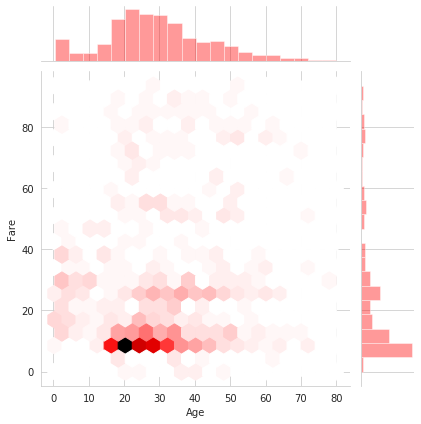

In [22]:
with sns.axes_style('whitegrid'):
    sns.jointplot(x='Age',y='Fare',data=df[df['Fare']<100],kind='hex',color='r')

In [23]:
df.reset_index(inplace=True)

In [24]:
df.drop('PassengerId',axis=1,inplace=True)

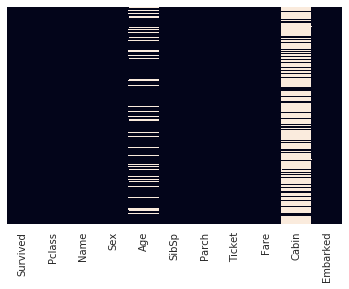

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

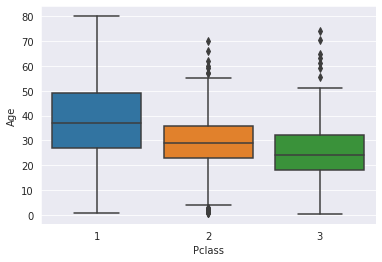

In [26]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [27]:
age_means=[]
for i in [1,2,3]:
    age_means.append(np.mean(df[df['Pclass']==i]['Age']))
age_means

[38.233440860215055, 29.87763005780347, 25.14061971830986]

In [28]:
def fill_age(var):
    if pd.isnull(var[0]):
        if var[1]==1:
            return age_means[0]
        elif var[1]==2:
            return age_means[1]
        else:
            return age_means[2]
    else:
        return var[0]
    

In [29]:
df['Age']= df[['Age','Survived']].apply(fill_age,axis=1)

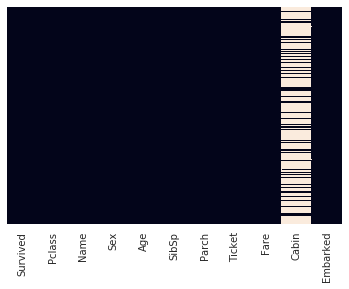

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [31]:
df.drop('Cabin',axis=1,inplace=True)

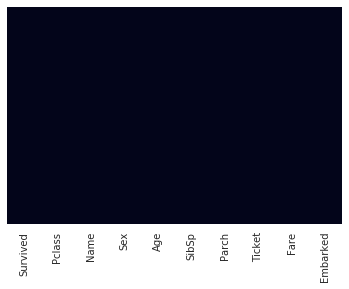

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [34]:
df.dropna(inplace=True)

In [35]:
tit= df.copy()

In [36]:
tit.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [37]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [38]:
sex= pd.get_dummies(df['Sex'],drop_first=True)

In [39]:
emb= pd.get_dummies(df['Embarked'],prefix='Emb',drop_first=True)

In [40]:
# pclass= pd.get_dummies(df['Pclass'],prefix='Pclass',drop_first=True)

In [41]:
df= pd.concat([df,sex,emb],axis=1)

In [42]:
df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Emb_Q,Emb_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1,0,1


In [43]:
df= df.drop(['Name','Sex','Ticket','Embarked'],axis=1)

In [44]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Emb_Q,Emb_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
5,0,3,25.140620,0,0,8.4583,1,1,0
6,0,1,54.000000,0,0,51.8625,1,0,1
7,0,3,2.000000,3,1,21.0750,1,0,1
8,1,3,27.000000,0,2,11.1333,0,0,1
9,1,2,14.000000,1,0,30.0708,0,0,0


In [45]:
X= df.drop('Survived',axis=1)
y= df['Survived']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logm= LogisticRegression()

In [50]:
logm.fit(X_train,y_train)

/home/siavash/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred= logm.predict(X_test)

In [52]:
from sklearn import metrics

In [53]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       167
           1       0.77      0.72      0.74       100

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



In [54]:
metrics.confusion_matrix(y_test,y_pred)

array([[145,  22],
       [ 28,  72]])

In [97]:
(0.84+0.77)/2

0.8049999999999999

In [55]:
(145+72)/(145+22+28+72)

0.8127340823970037

In [56]:
y_pred= logm.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))
metrics.confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       167
           1       0.77      0.72      0.74       100

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



array([[145,  22],
       [ 28,  72]])

In [57]:
# logm.intercept_
logm.coef_

array([[-0.62558614, -0.01352929, -0.30832202, -0.03747643,  0.00563485,
        -2.42913246, -0.21923057, -0.41061224]])

In [58]:
pd.concat([pd.DataFrame(logm.coef_.transpose(),index=X_train.columns,columns=['coef']),
           pd.DataFrame(logm.intercept_,index=['y_intercept'],columns=['coef'])])

,coef
Pclass,-0.625586
Age,-0.013529
SibSp,-0.308322
Parch,-0.037476
Fare,0.005635
male,-2.429132
Emb_Q,-0.219231
Emb_S,-0.410612
y_intercept,3.160735


In [59]:
metrics.mean_squared_error(y_test,y_pred)

0.18726591760299627

In [60]:
metrics.r2_score(y_test,y_pred)

0.20059880239520944

In [88]:
sex= pd.get_dummies(tit['Sex'],drop_first=True)
emb= pd.get_dummies(tit['Embarked'],prefix='Emb',drop_first=True)
pclass= pd.get_dummies(tit['Pclass'],prefix='Pclass',drop_first=True)

In [62]:
sex= pd.get_dummies(tit['Sex'],drop_first=False)
emb= pd.get_dummies(tit['Embarked'],prefix='Emb',drop_first=False)
pclass= pd.get_dummies(tit['Pclass'],prefix='Pclass',drop_first=False)

In [89]:

tit2= pd.concat([tit,sex,emb,pclass],axis=1)
tit3= tit2.drop(['Name','Sex','Ticket','Embarked','Pclass'],axis=1)
X= tit3.drop('Survived',axis=1)
y= tit3['Survived']

In [90]:
X.head()

,Age,SibSp,Parch,Fare,male,Emb_Q,Emb_S,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
logm= LogisticRegression()
logm.fit(X_train,y_train)


/home/siavash/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:

logm.intercept_
logm.coef_
pd.concat([pd.DataFrame(logm.coef_.transpose(),index=X_train.columns,columns=['coef']),
           pd.DataFrame(logm.intercept_,index=['y_intercept'],columns=['coef'])])


,coef
Age,-0.017855
SibSp,-0.220540
Parch,-0.059727
Fare,0.005516
male,-2.387706
Emb_Q,-0.301566
Emb_S,-0.239989
Pclass_2,-0.403110
Pclass_3,-1.525469
y_intercept,2.475976


In [93]:

logm.intercept_
logm.coef_
pd.concat([pd.DataFrame(logm.coef_.transpose(),index=X_train.columns,columns=['coef']),
           pd.DataFrame(logm.intercept_,index=['y_intercept'],columns=['coef'])])


,coef
Age,-0.017855
SibSp,-0.220540
Parch,-0.059727
Fare,0.005516
male,-2.387706
Emb_Q,-0.301566
Emb_S,-0.239989
Pclass_2,-0.403110
Pclass_3,-1.525469
y_intercept,2.475976


In [94]:
y_pred= logm.predict(X_test)
print(metrics.classification_report(y_test,y_pred))
metrics.confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       160
           1       0.80      0.65      0.72       107

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267



array([[142,  18],
       [ 37,  70]])

In [95]:
y_prob= logm.predict_proba(X_test)

In [96]:
dc= {'Survived_0_prob':y_prob[:,0],
     'Survived_1_prob':y_prob[:,1],
     'y_pred':y_pred,
     'y_true':y_test}
pd.DataFrame(dc).head()

,Survived_0_prob,Survived_1_prob,y_pred,y_true
639,0.905323,0.094677,0,0
147,0.455397,0.544603,1,0
278,0.933702,0.066298,0,0
484,0.519061,0.480939,0,1
770,0.886283,0.113717,0,0


In [99]:
metrics.accuracy_score(y_test,y_pred)

0.7940074906367042